## **Time Series Analysis Task Notebook**

This notebook is designed to test you through various Time Series Analysis tasks using the Bike Sharing dataset. The tasks will help you develop essential skills in handling time-based data, including cleaning and preprocessing, feature engineering, and model building. You'll explore techniques such as creating lag and rolling window features, implementing linear regression for time series prediction, and applying XGBoost with hyperparameter tuning. Finally, you'll evaluate and compare the performance of the models, providing insights into their effectiveness. These tasks will enhance your understanding of time series analysis and prepare you for real-world forecasting challenges.

# **About the Dataset**
The Bike Sharing Dataset contains information about bike rental counts in the city of Washington, D.C., recorded at hourly intervals. The dataset provides data on various factors that influence bike rentals, including weather conditions, time of day, and seasonal factors. It includes several features such as temperature, humidity, wind speed, and day of the week, which can be used for building predictive models to forecast bike rental demand.

The dataset spans multiple years and captures the number of bikes rented at each hour of the day, making it ideal for time series analysis. By leveraging this data, you can explore patterns in bike rentals over time, uncover seasonality, and implement models for predicting future rental demand.





## **Key Attributes in the Dataset:**

**instant:** Record index.

**dteday:** Date of the observation.

**season:** The season (1: Spring, 2: Summer, 3: Fall, 4: Winter).

**yr:** Year (0: 2011, 1: 2012).

**mnth:** Month of the year (1 to 12).

**hour:** Hour of the day (0 to 23).

**holiday:** Whether the day is a holiday (1: Yes, 0: No).

**weekday:** Day of the week (0 to 6).

**workingday:** Whether it's a working day (1: Yes, 0: No).

**weathersit:** Weather condition (1: Clear, 2: Mist, 3: Light Rain, 4: Heavy Rain).

**temp:** Temperature (normalized).

**hum:** Humidity (normalized).

**windspeed:** Wind speed (normalized).

**cnt:** The total number of bike rentals at that hour.

This dataset offers a comprehensive set of features to explore and analyze bike-sharing patterns, making it an excellent resource for time series forecasting tasks.

## **Exercise**

1. Load the [dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset) from Kaggle. Use the "hour.csv" file.
2. Visualize the structure of the dataset using appropriate libraries and plots.
3. <font color='green'> Clean and pre-process the dataset as required and prepare the data for modelling.</font>
4. <font color='green'>Create the lag and rolling windows features for the "cnt" column such as: 1 day lag, 1 week lag, 1 month, etc. and last 3 day rolling mean, last 3 hours rolling mean, etc. But it should be based on your dataset and what makes sense for this dataset.</font>
5. Implement linear regression to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.
6. <font color='green'>Implement XGBoost to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.</font>
7. Experiment with predicting different time periods, such as use all data to predict bike rentals for just the next day (24 hours) or the next entire month and then see how much better or worse the model gets
8. Experiment tuning hyperparameters

**Bonus task (Optional)**

This tasks is not mandatory, but it is designed for those who want to challenge themselves, enhance their critical thinking skills, or dive deeper into the topic. If you're eager to learn more or test your understanding, this task can provide additional learning opportunities.
1. Modelling: Implement an ARIMA model, evaluate it using relevant plots and provide a summary analysis .
  


<hr>
The hand-in exercise for this topic is Task 3,4 and 6 from the notebook “TSA_Task”. This
means that you have to do the cleaning of dataset, then create features (at least 5 new
features should be created, and you should be able to justify why you created each of
the features). And then, you should train an XGBoost model on the dataset. Note that
you also need to do relevant train, test, validation split and be able to explain why you
chose a certain split. Lastly, you should calculate evaluation metrics: rmse and mae to
show performance of your model. The hyperparameter tuning part is not required.
<hr>

<h3>Task 1 Load the dataset from Kaggle</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os


path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")
print("Path to dataset files:", path)


Path to dataset files: C:\Users\sebas\.cache\kagglehub\datasets\lakshmi25npathi\bike-sharing-dataset\versions\1


In [2]:
file_path = r"C:\Users\sebas\.cache\kagglehub\datasets\lakshmi25npathi\bike-sharing-dataset\versions\1\hour.csv"

df = pd.read_csv(file_path)

<hr>
<h3>Task 2 Visualize the structure of the dataset using appropriate libraries and plots.</h3>

In [3]:
print(f"Total rows / columns :",df.shape,"\n")
print(f"Name of all columns :",df.columns,"\n")
print(f"Data types of all columns :",df.dtypes)


Total rows / columns : (17379, 17) 

Name of all columns : Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object') 

Data types of all columns : instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


An observation here is that dteday is datatype object.

In [4]:
df['dteday'] = pd.to_datetime(df['dteday'], format='%Y-%m-%d')
print(f"Data types of all columns after date fix:",df.dtypes)

Data types of all columns after date fix: instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [5]:
display(df.head(5))
display(df.sample(frac=0.2, random_state=2))
display(df.tail(5))

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5943,5944,2011-09-10,3,0,9,4,0,6,0,1,0.58,0.5455,0.94,0.0896,3,4,7
15739,15740,2012-10-23,4,1,10,0,0,2,1,1,0.46,0.4545,0.88,0.1642,5,32,37
2906,2907,2011-05-06,2,0,5,0,0,5,1,1,0.44,0.4394,0.44,0.1642,13,43,56
12842,12843,2012-06-24,3,1,6,7,0,0,0,1,0.64,0.6061,0.69,0.1045,23,48,71
9053,9054,2012-01-18,1,1,1,3,0,3,1,2,0.44,0.4394,0.51,0.4925,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,7406,2011-11-10,4,0,11,4,0,4,1,1,0.38,0.3939,0.94,0.0896,1,2,3
3990,3991,2011-06-20,2,0,6,4,0,1,1,3,0.62,0.5606,0.88,0.1642,1,2,3
1210,1211,2011-02-23,1,0,2,12,0,3,1,1,0.26,0.2879,0.35,0.0896,11,56,67
3154,3155,2011-05-16,2,0,5,8,0,1,1,1,0.56,0.5303,0.73,0.2985,28,366,394


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [6]:
display(df.describe(include='all'))

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [7]:
print(df.info)

print(f"Any dublicates? :",df.duplicated().sum())

<bound method DataFrame.info of        instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1 2011-01-01       1   0     1   0        0        6           0   
1            2 2011-01-01       1   0     1   1        0        6           0   
2            3 2011-01-01       1   0     1   2        0        6           0   
3            4 2011-01-01       1   0     1   3        0        6           0   
4            5 2011-01-01       1   0     1   4        0        6           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375 2012-12-31       1   1    12  19        0        1           1   
17375    17376 2012-12-31       1   1    12  20        0        1           1   
17376    17377 2012-12-31       1   1    12  21        0        1           1   
17377    17378 2012-12-31       1   1    12  22        0        1           1   
17378    17379 2012-12-31       1   1    12  23        0        1           1

<strong>cnt</strong> is the most interresting column to check coralation with based on other columns, since it's the count of total bike rentals that hour. So the influences like holiday, weekday, windspeed, all are factors that could influence count of total bike's rented. 

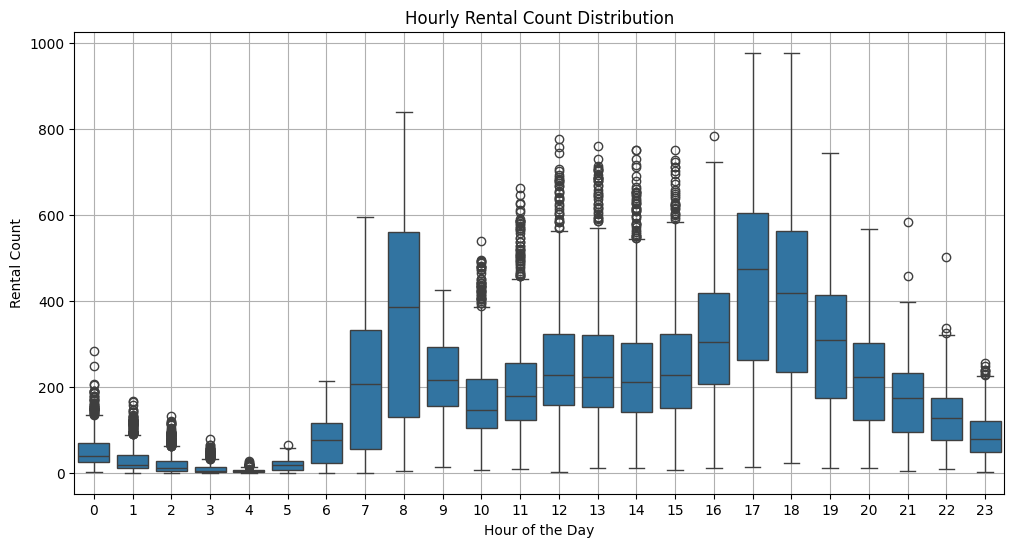

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='hr', y='cnt', data=df)
plt.title("Hourly Rental Count Distribution")
plt.xlabel("Hour of the Day")
plt.ylabel("Rental Count")
plt.grid(True)
plt.show()


<p><strong>Boxplot grouped by hour of the day</strong> : This shows what we would expect. Rental count is highest in the morning, daytime and evening, and lowest between 0-5am. Clear morning peak at 8am and evening peak 5pm. Daytime bit lower than rush hours(7-9am and 16-17pm). The rush hours have the wides boxes  but daytime have the most outliers. Could be related to events like workday or weekends</p>

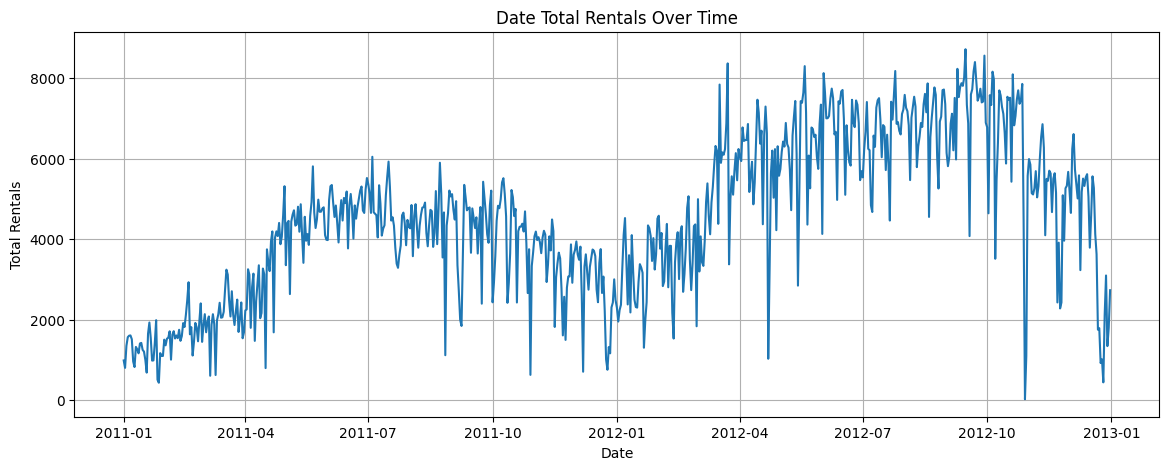

In [9]:
daily_df = df.groupby('dteday')['cnt'].sum().reset_index()

plt.figure(figsize=(14, 5))
sns.lineplot(x='dteday', y='cnt', data=daily_df)
plt.title("Date Total Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.grid(True)
plt.show()


<strong>Line Plot</strong> Mostly populer in the summmer months. There are some sudden drops, could be holidays. There is a strong upward trend at the start of 2011 and start of 2012.

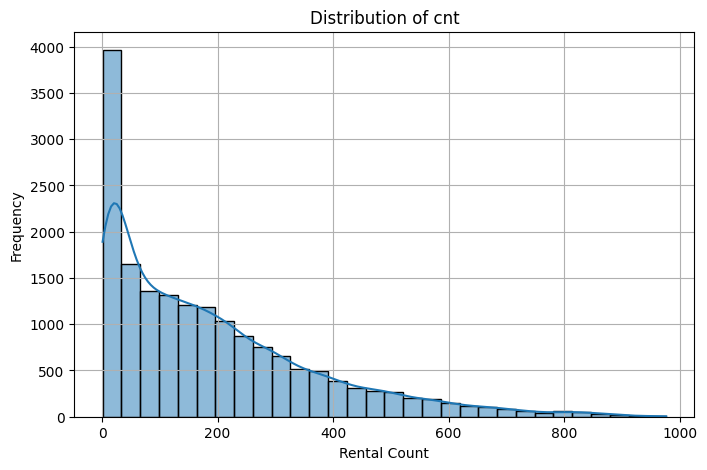

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['cnt'], kde=True, bins=30)
plt.title("Distribution of cnt")
plt.xlabel("Rental Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


<p><strong>Histogram with KDE curve(Kernel Density Estimation)</strong></p> The distribution is highly right skewed. Most hourly rental counts fall below 200 with a long tail stretching all the way to over 800. This show that high demand hours are rare, while low rental dominate the dataset. 

<hr>
<h1>Task 3 Clean and pre-process the dataset as required and prepare the data for modelling.</h1>

<h3>Firs lets drop irrelevant or data leakage columns:</h3>
<p>'instant' is just an index and irrelevant. The 'casual' and 'registered' values together give the sum of total 'cnt'. We want to remove these are they are will predict the 'cnt', but it's cheating since they contain the total value we're trying to repedict. Basiclly, it's giving the model the answer straight away. We want to remove these to avoid data leakage. They ain't attributes we want the model to predict on.</p>



In [11]:
df.drop(columns=['instant','casual', 'registered'], inplace=True)

<h3>Add Index</h3>
<p>Lets index everything with 'dteday' + 'hour' for 'rolling' and 'lag'.</p>

In [12]:
df['datetime'] = pd.to_datetime(df['dteday'], format='%Y-%m-%d')+pd.to_timedelta(df['hr'], unit='h')
df.set_index('datetime', inplace=True)
print(f"Index type:",df.index.dtype)

Index type: datetime64[ns]


<h3>Sort by datetime</h3>
<p>We want the data to be sorted chronologically for lag and rolling</p>

In [13]:
df = df.sort_values('datetime')

<h4> To confirm we have cleaned and progressed the data.</h4>

In [14]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
datetime = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

print(f"Numerical columns: {numerical}\n")
print(f"Date columns: {datetime}\n")

display(df.head(5))

Numerical columns: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

Date columns: ['dteday']



,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
2011-01-01 01:00:00,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2011-01-01 02:00:00,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
2011-01-01 03:00:00,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
2011-01-01 04:00:00,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


<hr>
<h1>Task 4 Create the lag and rolling windows features for the "cnt" column such as: 1 day lag, 1 week lag, 1 month, etc. and last 3 day rolling mean, last 3 hours rolling mean, etc. But it should be based on your dataset and what makes sense for this dataset.</h1>

<h3>Lag</h3>

<p>Bike count 1 hour ago. This captures short-term memory. Demand patterns should'nt change suddenly hour to hour</p>

In [15]:
# Lag of 1 hour
df['cnt_lag_1'] = df['cnt'].shift(1)

<p>Bike count at same hour yesterday. This captures daily seasonality. Like morning/afternoon rush that happens daily</p>

In [16]:
# Lag of 24 hour
df['cnt_lag_24'] = df['cnt'].shift(24)

Bike count at same hour last week. This captures weekly cycles, like weekends differ from weekdays.

In [17]:
# Lag of 1 week
df['cnt_lag_168'] = df['cnt'].shift(24*7)

<h3>Rolling</h3>

Mean demand over last 3 hours. This is to smooth out short-term fluctuations. Reduces noisy spikes

In [18]:
# Rolling mean of last 3 hours
df['cnt_roll_3hr'] = df['cnt'].rolling(window=3).mean()

Mean demand over last 3 days. This is to capture broader trends like sustained rise and fall in demand

In [19]:
# Rolling mean of last 3 days
df['cnt_roll_72hr'] = df['cnt'].rolling(window=72).mean()

Drop rows that are null caused by shifting and rolling

In [20]:
df.dropna(inplace=True)

display(df.head(5))

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,cnt_lag_1,cnt_lag_24,cnt_lag_168,cnt_roll_3hr,cnt_roll_72hr
datetime,,,,,,,,,,,,,,,,,,,
2011-01-08 07:00:00,2011-01-08,1,0,1,7,0,6,0,2,0.16,0.1818,0.74,0.1045,9,2.0,84.0,16.0,5.333333,66.361111
2011-01-08 08:00:00,2011-01-08,1,0,1,8,0,6,0,3,0.16,0.1818,0.93,0.1045,15,9.0,210.0,40.0,8.666667,66.111111
2011-01-08 09:00:00,2011-01-08,1,0,1,9,0,6,0,3,0.16,0.1818,0.93,0.1045,20,15.0,134.0,32.0,14.666667,65.166667
2011-01-08 10:00:00,2011-01-08,1,0,1,10,0,6,0,2,0.18,0.1970,0.80,0.1642,61,20.0,63.0,13.0,32.000000,63.305556
2011-01-08 11:00:00,2011-01-08,1,0,1,11,0,6,0,2,0.20,0.1818,0.69,0.3881,62,61.0,67.0,1.0,47.666667,62.569444


<hr>
<h1>Task 6 Implement XGBoost to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.</h1>

In [21]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

x = df.drop(columns=['cnt','dteday']) 
y = df['cnt']

train_size =len(df) - 168  # Last 168 rows = 1 week for testing
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

results = pd.DataFrame({
    "Actual/ground truth": y_test.values,
    "Predicted": y_pred,
    "Residuals": y_test.values - y_pred
}, index=x_test.index)

display(results.head(25))
print(results['Residuals'].describe())
print(results['Residuals'].abs().sort_values(ascending=False).head(10))
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

,Actual/ground truth,Predicted,Residuals
datetime,,,
2012-12-24 23:00:00,11,5.835803,5.164197
2012-12-25 00:00:00,13,11.676108,1.323892
2012-12-25 01:00:00,13,12.800306,0.199694
2012-12-25 02:00:00,7,10.667230,-3.667230
2012-12-25 04:00:00,1,2.905477,-1.905477
2012-12-25 05:00:00,3,7.995523,-4.995523
2012-12-25 06:00:00,7,15.625930,-8.625930
2012-12-25 07:00:00,6,16.999586,-10.999586
2012-12-25 08:00:00,11,17.762661,-6.762661


count    168.000000
mean       1.179141
std       19.764367
min     -112.690277
25%       -6.546047
50%        0.209062
75%        8.482115
max       97.845825
Name: Residuals, dtype: float64
datetime
2012-12-31 17:00:00    112.690277
2012-12-31 15:00:00     97.845825
2012-12-31 18:00:00     63.134125
2012-12-31 16:00:00     62.942871
2012-12-31 12:00:00     55.393692
2012-12-28 14:00:00     54.735779
2012-12-28 17:00:00     52.395020
2012-12-31 14:00:00     45.980927
2012-12-28 10:00:00     38.834831
2012-12-31 11:00:00     33.033463
Name: Residuals, dtype: float64
Mean Squared Error: 389.6954040527344
Mean Absolute Error: 12.069255828857422
R-squared: 0.925817608833313


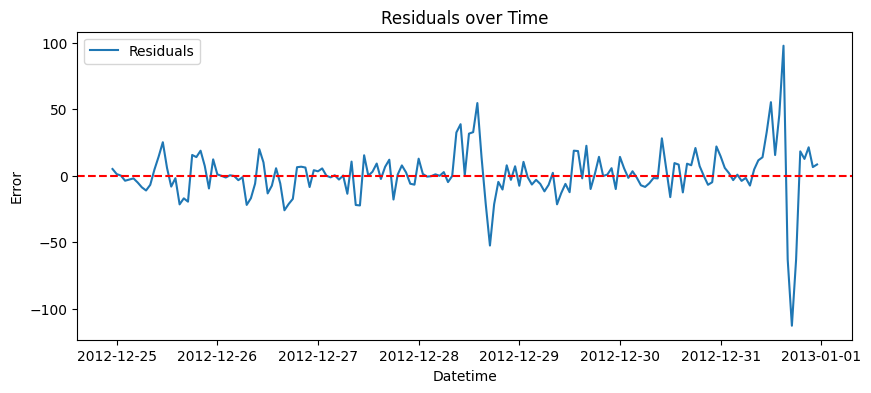

Top 5 largest residuals:
datetime
2012-12-31 17:00:00    112.690277
2012-12-31 15:00:00     97.845825
2012-12-31 18:00:00     63.134125
2012-12-31 16:00:00     62.942871
2012-12-31 12:00:00     55.393692
Name: Residuals, dtype: float64


In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(results.index, results['Residuals'], label='Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals over Time")
plt.xlabel("Datetime")
plt.ylabel("Error")
plt.legend()
plt.show()

print("Top 5 largest residuals:")
print(results['Residuals'].abs().sort_values(ascending=False).head())

<h3>Evaluation</h3>

<p>After training the XGBoost model I evalute its performance using these three metrics: Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared(R<sup>2</sup>)</p>
<ul>
    <li><p><strong>(MAE)Mean Absolute Error</strong>(12.07): This tells us how far off our predictions are from the actual values are on avarage. 12 bikes off per hour is reasonable considering the high variablity in hourly rentals. MAE is useful because it is easy to interpret</p>
    </li>
    <li><p><strong>(MSE)Mean Squared Error:</strong>(389.70): This value is high, but some residuals are extremely large like +112 and -113. MSE penalizes largererrors more than smaller ones by squaring the residuals beofore averaging.</p>
    </li>
    <li><p><strong>R-squared(R<sup>2</sup>)</strong>(0.926): This means the model explain 92.6% of the variablity in bike rental. This is excellent. Indicates a strong predictive power.</p>
    </li>
</ul>